## 1.0 Business Understanding


#### 1.1 Business Overview  
Customer churn, where subscribers discontinue services or switch to competitors, is a major challenge in the telecom industry. A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports emphasizes that retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a strategic priority.  

Syriatel, one of Syria’s largest telecom providers with over 6 million active customers and a 55% market share, faces rising churn despite strong coverage and service reliability. This project leverages machine learning to predict at-risk customers, enabling proactive retention strategies that improve loyalty, optimize resources, and sustain profitability.  


#### 1.2 Business Problem

Syriatel is struggling with rising customer churn, which threatens its revenue and market position. The company lacks a clear way to know customers that are likely to leave. Without timely insights, Syriatel risks losing more customers to competitors and incurring higher costs to replace them. Developing a predictive solution is critical to identify at-risk customers early and take proactive steps to retain them.  


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



#### 1.4 Success criteria:
 - A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel
 - The model identifies the most important features that explain why customers churn
 - The findings can be translated into clear, practical recommendations that SyriaTel can act on to reduce churn

## 2.0 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).


#### 2.1 Load Dataset
1. Import libraries (pandas, numpy, matplotlib, seaborn).
2. Load dataset.

In [16]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# Load dataset 
data = pd.read_csv(r"C:/Users/kabif/OneDrive/Desktop/project3/Telecom's dataset/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.2 Dataset Overview

In [18]:
# Summaryinformation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric(total minutes, charges, account length) and categorical(international plan, voicemail plan) Our Target variable is `Churn`.

In [19]:
# statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [20]:
#checking the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Data Preparation and Cleaning

In [21]:
# Check for duplicate values
data.duplicated().sum()

0

In [22]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values recorded in the dataset

#### Dropping unecessary columns

In [23]:
#dropping unecessary columns
data.drop(columns= ['area code', 'phone number', 'state'], inplace=True)

In [24]:
#Checking the distribution for class imbalance
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [25]:
#checking the % of class imbalance
data['churn'].value_counts(normalize = True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [26]:
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

### Explaratory Data Analysis(EDA)

### Univariate Analysis
Univariate analysis examines each variable individually to understand its distribution and central tendency.

In [27]:
data.nunique()

account length             212
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

visualize unique variables in the categorical variables that is one with least number of unique variables.

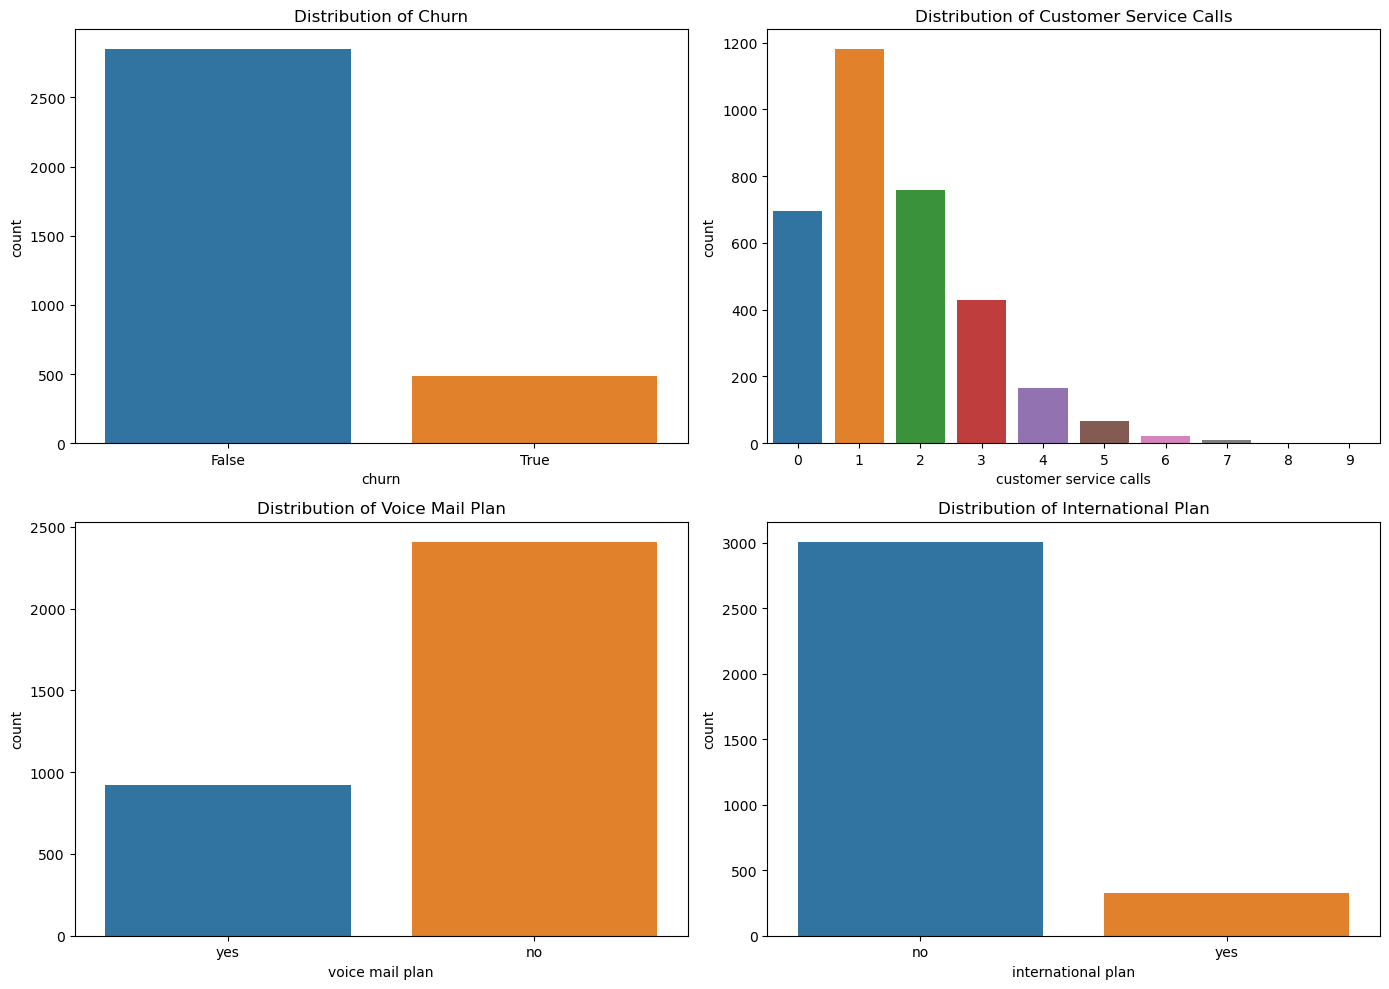

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for churn
sns.countplot(ax=axes[0, 0], x='churn', data=data)
axes[0, 0].set_title('Distribution of Churn')

# Plot for customer service calls
sns.countplot(ax=axes[0, 1], x='customer service calls', data=data)
axes[0, 1].set_title('Distribution of Customer Service Calls')

# Plot for voice mail plan
sns.countplot(ax=axes[1, 0], x='voice mail plan', data=data)
axes[1, 0].set_title('Distribution of Voice Mail Plan')

# Plot for international plan
sns.countplot(ax=axes[1, 1], x='international plan', data=data)
axes[1, 1].set_title('Distribution of International Plan')

plt.tight_layout()
plt.show()

From the above plot and value count analysis we can see that out of 3,333 customers;

Churn - (2850 remained , 483 left)

Voicemail Plan - (922 have it, 2411 don't)

International plan - (323 have it, 3010 don't)



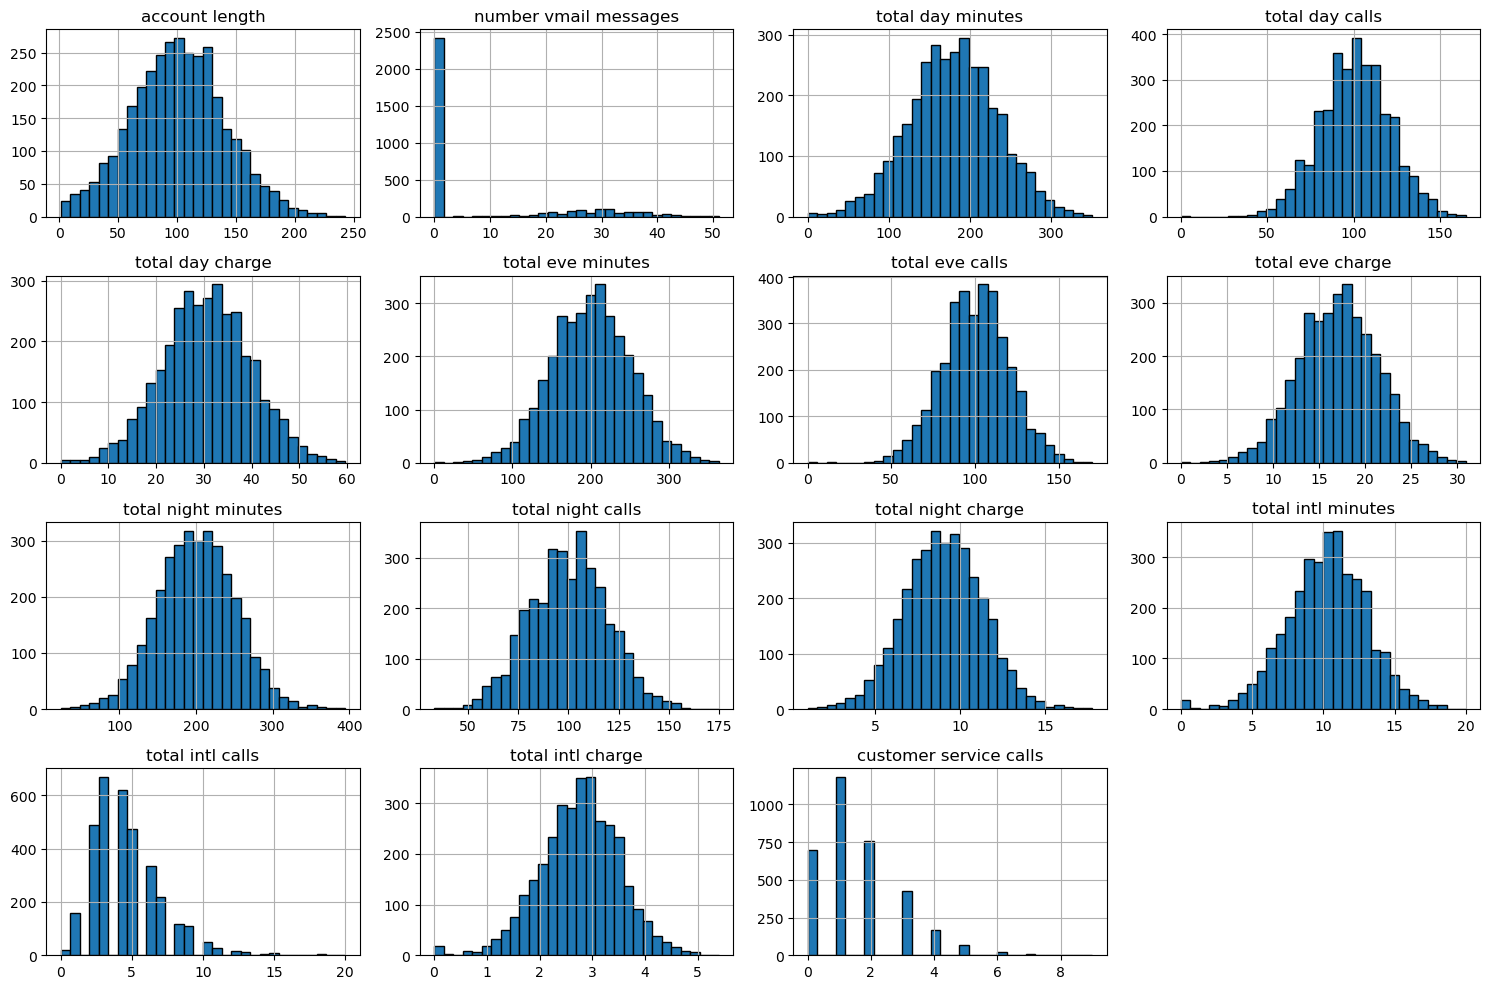

In [29]:
# Plot histograms only for numeric columns
data.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


From the above we can see normal distribution in the following columns;

account length is normally distributed - 1

total international (calls, charge,minutes) are normarlly distributed - 3

total night (minutes, calls, and charge) are normally distributed - 3

total evening (minutes, calls, and charge) are normally distributed - 3

total day (minutes, calls, and charge) are normally distributed - 3

 These normally distributed values may come in handy later in the analysis

In [30]:
# sns.pairplot(data, hue='churn', diag_kind='kde', plot_kws={'alpha': 0.5})
# plt.show()

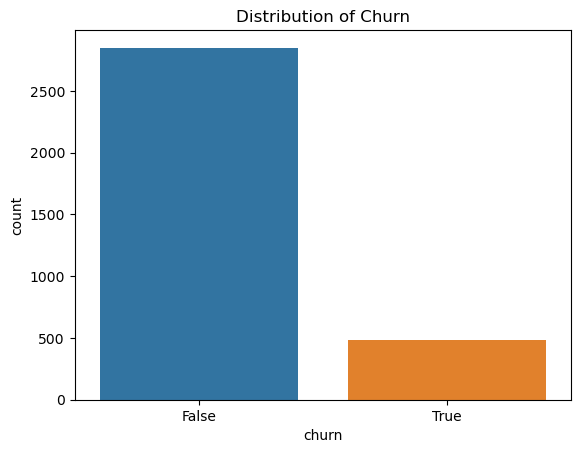

In [31]:
# Check distribution of target variable (churn)
sns.countplot(x="churn", data=data)
plt.title("Distribution of Churn")
plt.show()

### Bivariate Analysis

We shall work with the churn column vs customer service, international plan and voice mail plan and account duration

Churn vs customer service calls

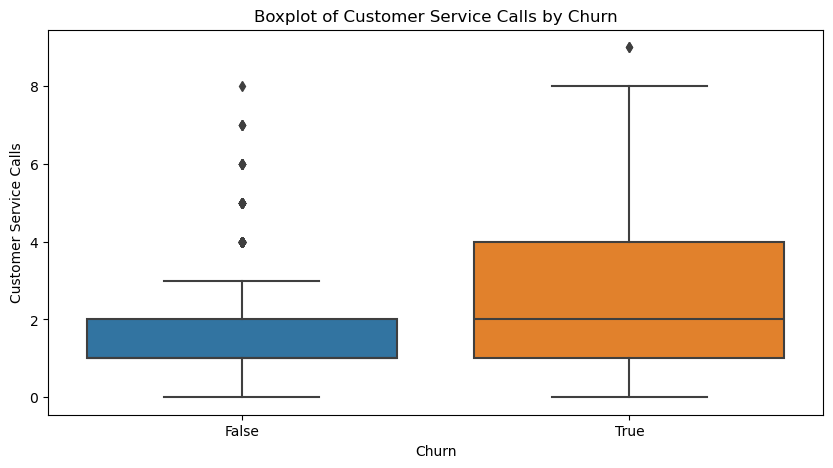

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='churn', y='customer service calls')
plt.title('Boxplot of Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

Customers who churn tend to have made more customer service calls compared to those who stay

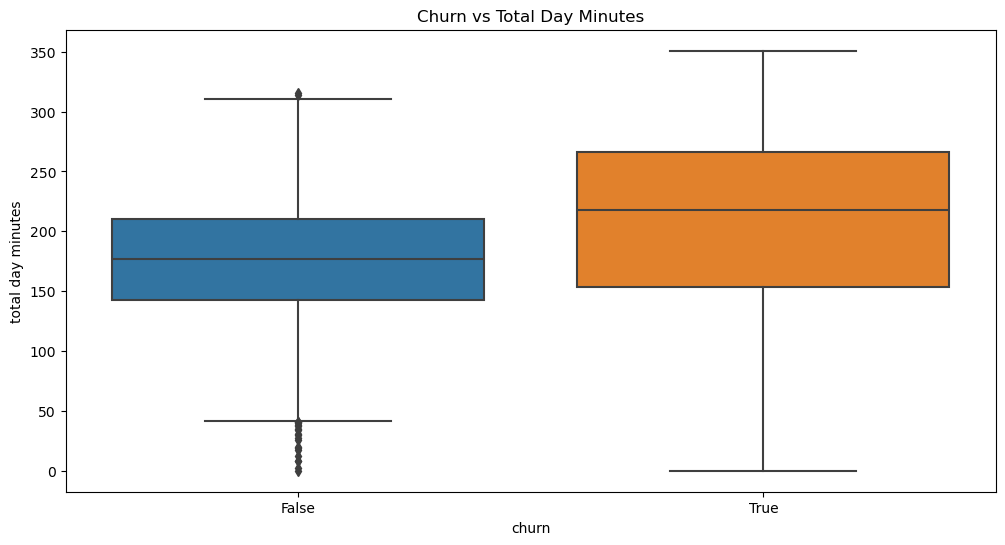

In [35]:
# Check how churn relates to total day minutes
plt.figure(figsize=(12,6))
sns.boxplot(x="churn", y="total day minutes", data=data)
plt.title("Churn vs Total Day Minutes")
plt.show()


Customers who churned generally used slightly more day minutes compared to those who stayed.

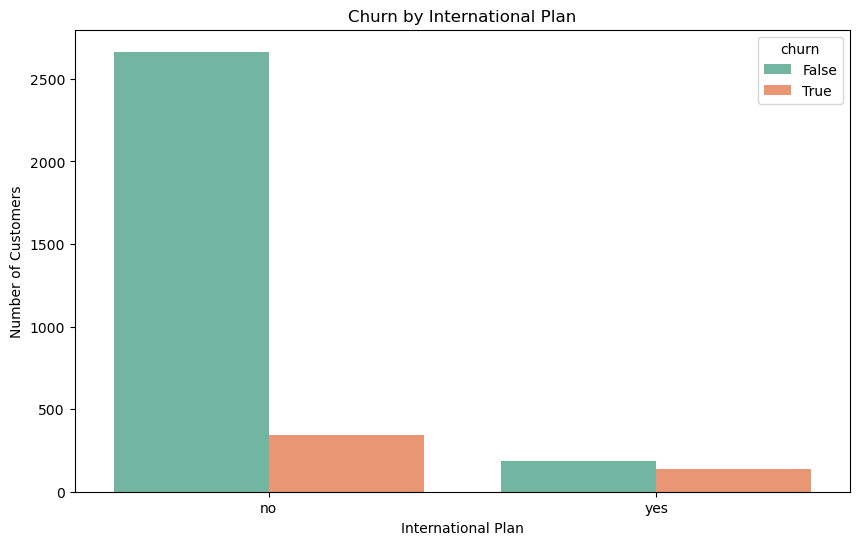

In [37]:
# Plot to show relationship between international plan and churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'international plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

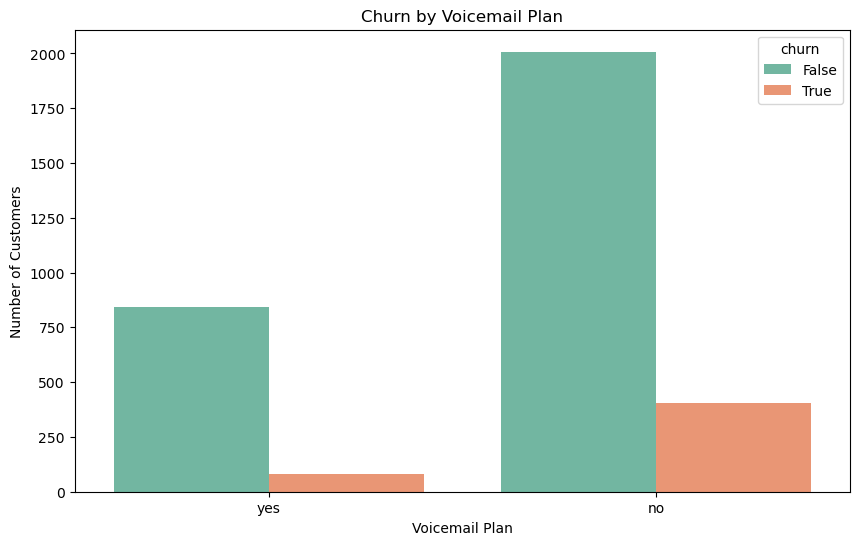

In [38]:
# Bar plot to show the relationship between voicemail plan and churn
plt.figure(figsize = (10, 6))
sns.countplot(x = 'voice mail plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


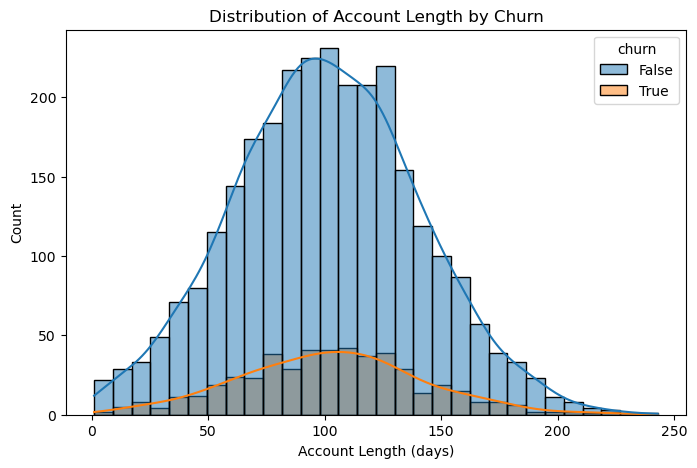

In [50]:
#histogram to show the distribution of account length by churn
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'account length', hue = 'churn', kde = True, bins = 30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()

#### Multivariate Analysis

Multivariate analysis considers the effect of multiple variables simultaneously. This is crucial because relationships can change when controlling for other factors.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

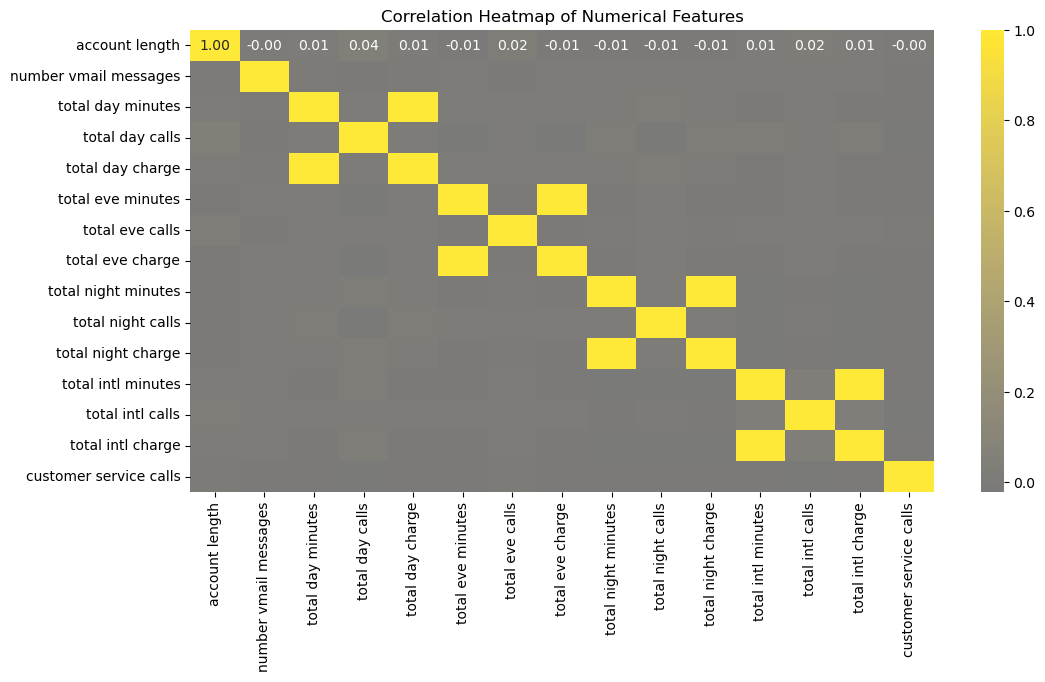

In [52]:
numeric_data = data.select_dtypes(include = ["number"])
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "cividis", center = 0, fmt = ".2f")
#annot is for placing the numbers inside the squares
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

From the correlation heatmap, some of the features share a perfect correlation of 1.0. They include

total_day_charge and total_day_minutes features.

total_eve_charge and total_eve_minutes features.

total_night_charge and total_night_minutes features.

total_intl_charge and total_intl_minutes features.

This causes severe multicollinearity because one varibale is perfectly predictable from the other.

Since our problem is business focused, the charges matter more than minutes hence will drop the minutes columns.

In [58]:
# checking out for outliers
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


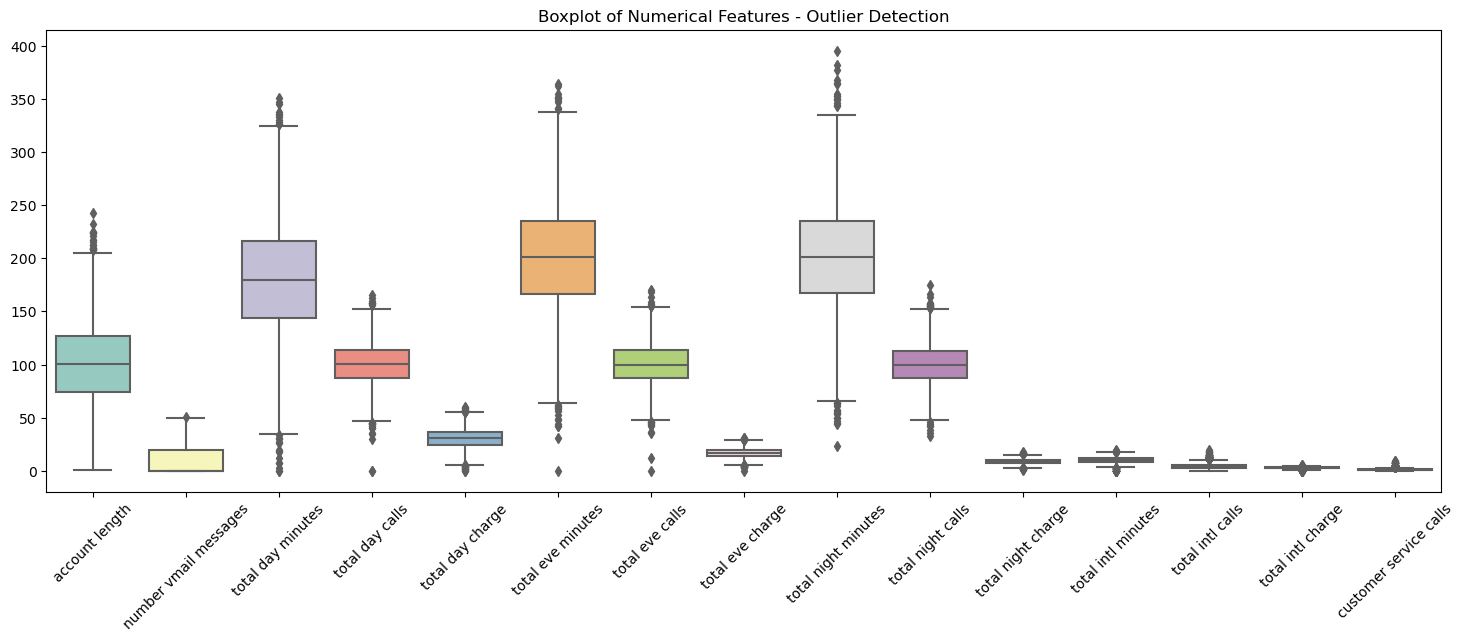

In [51]:
numerical_features = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(18, 6))
palette = sns.color_palette("Set3", len(numerical_features))  

sns.boxplot(data=data[numerical_features], palette=palette)

plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.xticks(rotation=45)
plt.show()

#### Encoding

Using the object column we sgall work on conducting modelling

In [53]:
print("Value counts before encoding:")
print(data['churn'].value_counts())

Value counts before encoding:
churn
False    2850
True      483
Name: count, dtype: int64


In [54]:
#import libraries
from sklearn.preprocessing import LabelEncoder

In [55]:
label_encoder = LabelEncoder() # create an instance of Label Encoder
data["churn"] = label_encoder.fit_transform(data["churn"]) # Fit and transform the target variable

# Check the counts after encoding
print("Value counts after encoding:")
print(data['churn'].value_counts())

Value counts after encoding:
churn
0    2850
1     483
Name: count, dtype: int64


In [69]:
#one hot encoding

data = pd.get_dummies(data, columns = ["international plan", "voice mail plan"], drop_first = True)
data.shape

(3333, 18)

In [70]:
data.shape

(3333, 18)

### Data Splitting

In [71]:
#import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [72]:
#split the data set into 
#Features
X = data.drop("churn", axis=1)
#Target
y = data["churn"]

In [73]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [75]:
# stratify ensures the split maintains the same class imbalance as the original dataset
smote = SMOTE(random_state=42)
# Fit and training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: churn
0    1995
1     338
Name: count, dtype: int64
After SMOTE: churn
0    1995
1    1995
Name: count, dtype: int64


### Modelling

####  Logistic Regression

In [76]:
#import all necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [77]:
# Make a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
# Train the model
logreg.fit(X_train_resampled, y_train_resampled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [89]:
# Make predictions on test data
y_pred = logreg.predict(X_test)




#### Evaluation of Model

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       855
           1       0.33      0.66      0.44       145

    accuracy                           0.75      1000
   macro avg       0.63      0.72      0.64      1000
weighted avg       0.84      0.75      0.78      1000



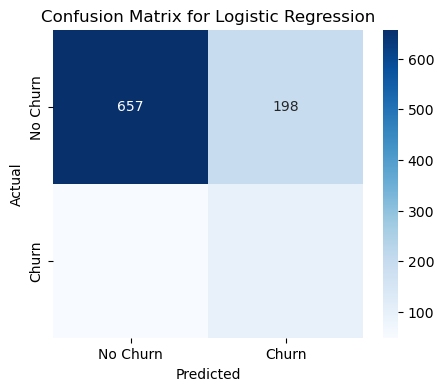

In [84]:
#Model Evaluation

# Classification report
print(classification_report(y_test, y_pred))


# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Model demonstrates stronger perfomsnce in identification of actual churn cases, achieving a 50% recall rate fpr churners, though with moderate precision of 39%. This resulted in an f1-score of 44% for the churn class, whime maintaining an overall classification accuracy of 81% across both classes.

#### Decision Tree

In [91]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       855
           1       0.55      0.83      0.66       145

    accuracy                           0.88      1000
   macro avg       0.76      0.86      0.79      1000
weighted avg       0.91      0.88      0.89      1000



#### Random Forest

In [85]:
# importing of necessary library 
from sklearn.ensemble import RandomForestClassifier

In [86]:
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train_resampled, y_train_resampled)
y_pred_forest = forest.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_forest))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       855
           1       0.69      0.80      0.74       145

    accuracy                           0.92      1000
   macro avg       0.83      0.87      0.85      1000
weighted avg       0.92      0.92      0.92      1000



The Random Forest achieved 92% accuracy with 73% churn precision, reducing overfitting and false positives through ensemble averaging. It outperformed the single decision tree by better balancing precision and recall.